**©  Scott A. Bruce. Do not distribute.**

# Machine learning with scikit-learn

This material follows Chapter 11 in the Python Workshop textbook.


# 1. Machine learning

In this chapter, on machine learning, you will learn how to construct linear regression, logistic regression, decision tree, random forest, Naive Bayes, and AdaBoost algorithms. These algorithms can be used to solve a wide range of problems, from predicting rainfall to detecting credit card fraud and identifying diseases.

Then, you will learn about Ridge and Lasso, two regularized machine learning algorithms that are variations of Linear Regression. You will learn about using regularization and cross-validation to obtain accurate results with data that the algorithm has never seen before.

After completing this chapter, you will be able to apply multiple machine learning algorithms to solve classification and regression problems. You will be capable of using advanced tools such as a confusion matrix and a classification report to interpret results. You will also be able to refine your models using regularization and hyperparameter tuning. In short, you will have the tools to use machine learning to solve real-world problems, including predicting cost and classifying objects.

## 2. Linear regression

Before implementing the algorithm, let's take a brief look at the libraries that we will import and use in our programs: 
 - pandas – You learned how to use pandas in Chapter 10, Data Analytics with pandas and NumPy. When it comes to machine learning, all data will be handled through pandas. Loading data, reading data, viewing data, cleaning data, and manipulating data all require pandas, so pandas will always be our first import. 
 - NumPy – NumPy was introduced in Chapter 10, Data Analytics with pandas and NumPy, as well. This will be used for mathematical computations on the dataset. It's always a good idea to import NumPy when performing machine learning. 
 - LinearRegression – The LinearRegression library should be implemented every time linear regression is used. The LinearRegression library will allow you to build linear regression models and test them in very few steps. Machine learning libraries do the heavy lifting for you. In this case, LinearRegression will place weights on each of the columns and adjust them until it finds an optimal solution to predict the target column, which in our case would be the median house value. 
 - Mean_squared_error – In order to find optimal values, the algorithm needs a measure to test how well it's doing. Measuring how far the model's predicted value is from the target value is a standard place to start. In order to avoid negatives canceling out positives, we can use mean_squared_error. To compute the mean_squared_error, the prediction of each row is subtracted from the target column or actual value, and the result is squared. Each result is summed, and the mean is computed. Finally, taking the square root keeps the units the same. 
 - Train_test_split – Python provides train_test_split to split data into a training set and a test set. Splitting the data into a training set and test set is essential because it allows users to test the model right away. Testing the model on data the machine has never seen before is the most important part of building the model because it shows how well the model will perform in the real world.
 
These libraries are a part of scikit-learn. scikit-learn has a wealth of excellent online resources for beginners. See https://scikit-learn.org/stable/ for more information.

# 3. Exercise 145: Using linear regression to predict accuracy of the median values of our dataset

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
# load data
housing_df = pd.read_csv('HousingData.csv')
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [15]:
# drop null values
housing_df = housing_df.dropna()
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
# declare X and y
X = housing_df.iloc[:,:-1]
X.shape
y = housing_df.iloc[:, -1]

(394, 13)

In [17]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape

(315, 13)

In [18]:
#Create the regressor: reg
reg = LinearRegression()
 

In [19]:
#Fit the regressor to the training data
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict on the test data: y_pred
y_pred = reg.predict(X_test)
y_test-y_pred #mean sq err = sum of squared (y_test-y_pred)

95      0.054921
256     5.914218
446    -2.406197
438     2.151163
443    -2.378739
         ...    
341     2.256737
48      3.860227
354     3.753379
372    26.218159
216    -3.036238
Name: MEDV, Length: 79, dtype: float64

In [21]:
# Compute and print RMSE
mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

24.963768912918816

Root Mean Squared Error: 4.996375577648143


Note that there are other errors to choose from. The square root of mean_squared_error is a standard choice with linear regression. rmse, short for "root mean squared error," will give us the error of the model on the test set.

A root mean squared error of 4.18 means that, on average, the model predicts values approximately 4.18 units away from the target value, which is not bad in terms of accuracy. Since the median value (from 1980) is in the thousands, the predictions are about $4,180 off.


# 4. Cross-validation

In cross-validation, also known as CV, the training data is split into five folds (any number will do, but five is standard). The machine learning algorithm is fit on one fold at a time and tested on the remaining data. The result is five different training and test sets that are all representative of the same data. The mean of the scores is usually taken as the accuracy of the model.

**Note**: 5 folds is only a suggestion, any natural number can be used.

Cross-validation is a core tool for machine learning. Mean test scores on different folds are more helpful than one mean test score on the entire set, which we performed in the first exercise. When examining one test score, there is no way of knowing whether it is low or high. Five test scores give a better picture of the accuracy of the model. Cross-validation can be implemented in a variety of ways. A standard approach is to use `cross_val_score`, which returns an array of scores for each fold; `cross_val_score` breaks X and y into the training set and test set for you. Let's modify our regression machine learning function to include `cross_val_score` in the following exercise.

In [22]:
from sklearn.model_selection import cross_val_score
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjun

In [23]:
#Define the regression_model_cv function, which takes a fitted model as one parameter. 
# The k = 5 hyperparameter gives the number of folds.
def regression_model_cv(model, k=5):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=k)
    rmse = np.sqrt(-scores)
    print('Reg rmse:', rmse)
    print('Reg mean:', rmse.mean ())

In sklearn, the scoring options are sometimes limited. Since mean_squared_error is not an option for cross_val_score, we choose the neg_mean_squared_error. cross_val_score takes the highest value by default, and the highest negative mean squared error is 0.

In [24]:
regression_model_cv(LinearRegression())

Reg rmse: [3.26123843 4.42712448 5.66151114 8.09493087 5.24453989]
Reg mean: 5.337868962878362


In [25]:
regression_model_cv(LinearRegression(), k=3)

Reg rmse: [ 3.72504914  6.01655701 23.20863933]
Reg mean: 10.983415161090932


In [26]:
regression_model_cv(LinearRegression(), k=6)

Reg rmse: [3.23879491 3.97041949 5.58329663 3.92861033 9.88399671 3.91442679]
Reg mean: 5.086590810801099


You have found out that there is a large discrepancy between the number of folds. One reason is that we have a reasonably small dataset to begin with. In the real world, with a huge amount of data, this generally does not make a huge difference to the results when we compare results with different folds.

# 5. Regularization with ridge and lasso

classical regression:  beta_hat = argmin( ||y-xbeta||_2 sqare)
XTX must be a positive definate
X does have multicollinearity --> 
not all of columns of X have impact on Y -->sparsity

Choose the penalty function: l1 norm: lasso
l2 norm :Ridge
l1+l2 norm : elastic
l0+l2: hard ridge
l0 norm: 

Regularization is an important concept in machine learning; it's used to counteract overfitting. In the world of big data, it's easy to overfit data to the training set. When this happens, the model will often perform badly on the test set as indicated by mean_squared_error, or some other error. You may wonder why a test set is kept aside at all. Wouldn't the most accurate machine learning model come from fitting the algorithm on all the data? The answer, generally accepted by the machine learning community after years of research and experimentation, is probably not. There are two main problems with fitting a machine learning model on all the data:
- **There is no way to test the model on unseen data.** Machine learning models are powerful when they make good predictions on new data. Models are trained on known results, but they perform in the real world on data that has never been seen before. It's not vital to see how well a model fits known results (the training set), but it's absolutely crucial to see how well it performs on unseen data (the test set). 
- **The model may overfit the data.** Models exist that may fit any set of data points perfectly. But it's likely a poor predictor of new data.

There are many models and approaches to counteract overfitting. Let's go over a couple of models now. 

- Ridge is a simple alternative to linear regression, designed to counteract overfitting. Ridge includes an L2 penalty term (L2 is based on Euclidean Distance) that shrinks the linear coefficients based on their size.  suitable for X multicollinearity

$$\sum_{i=1}^n \left(y_i - \sum_{j=1}^p\mathbf{x}_{ij} \beta_j\right)^2 + \lambda_r \sum_{j=1}^p \beta_j^2$$

- Lasso is another regularized alternative to linear regression. Lasso adds a penalty equal to the absolute value of the magnitude of coefficients. This L1 regularization (L1 is taxicab distance.) can eliminate some columns and result in a model that is sparse by comparison. suitable when the beta is sparse (only a few of those are non-zero)

$$\sum_{i=1}^n \left(y_i - \sum_{j=1}^p\mathbf{x}_{ij} \beta_j\right)^2 + \lambda_{\ell} \sum_{j=1}^p \left|\beta_j\right|$$

Why does lasso induce sparse estimates of parameters?  The parameter space that satisfies the L1 constraint has edges while the same space for the L2 constraint does not.  See the picture below.  The size of the green spaces correspond to the coefficient for the penalty function.  The countour lines represent solutions with the same residual some of sum squares (without penalization).

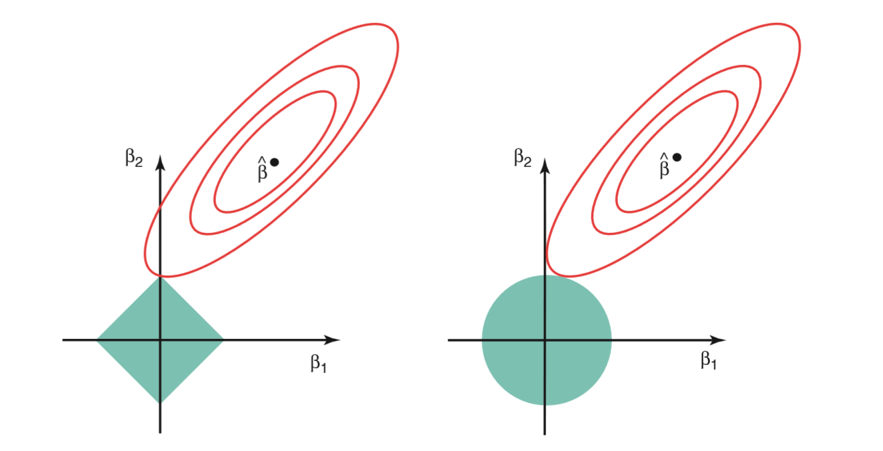
Source: https://miro.medium.com/max/1400/1*XC-8tHoMxrO3ogHKylRfRA.png

Let's look at an example to check how Ridge and Lasso perform on our Boston Housing dataset. In this example, we perform regularization on the dataset using Ridge and Lasso to counteract overfitting. 

In [27]:
from sklearn.linear_model import Ridge
regression_model_cv(Ridge())

Reg rmse: [3.17202127 4.54972372 5.36604368 8.03715216 5.03988501]
Reg mean: 5.232965166251772


Another basis of comparison is the worst score of the five. In Ridge, we obtained 8.03715216 as the worst score. In linear regression, we obtained 23.20863933 as the worst score. This suggests that 23.20863933 is badly overfitting the training data. In Ridge, the penalty reduces the tendency for the model to overfit to the training data.

In [28]:
from sklearn.linear_model import Lasso 
regression_model_cv(Lasso())

Reg rmse: [3.52318747 5.70083491 7.82318757 6.9878025  3.97229348]
Reg mean: 5.601461185384289


Regularization is an essential tool when implementing machine learning algorithms. Whenever you choose a particular model, be sure to research regularization methods to improve your results, as you observed in the preceding example.
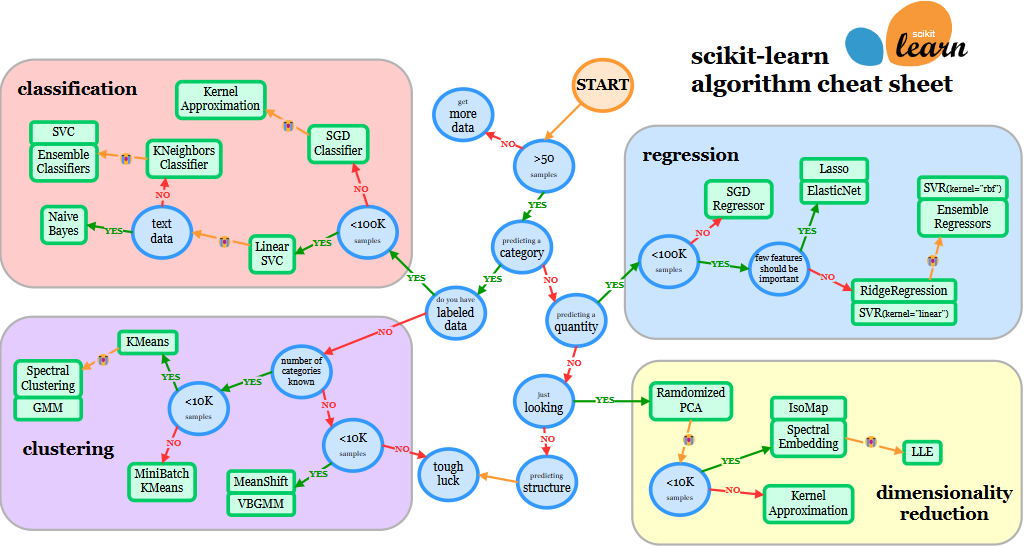
penalized regression to reduce the redundant columns that either are not associated with the response variable or correlated with the other explanatory variables
method to reduce dimensionality


In [29]:
from sklearn.model_selection import GridSearchCV

#hyperparameter tuning
grid = dict()
grid['alpha'] = np.arange(0.01, 500, .1) ## 5 fold (cross validation) X 5000 
n_folds=5
# define search
search = GridSearchCV(Ridge(), grid, scoring='neg_mean_squared_error', cv=n_folds, n_jobs=-1)
# perform the search
results = search.fit(X, y)
#output results for best fit

k = search.best_params_
print("Best alpha: {}".format(k))
score = search.best_score_
rsm = np.sqrt(-score)
print("Best score: {}".format(rsm))


Best alpha: {'alpha': 55.51}
Best score: 5.294997221561876


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Mean score')

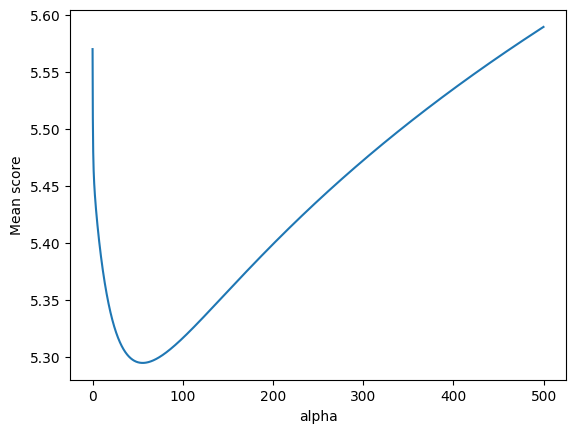

Reg rmse: [3.28254197 5.20816    5.96402327 6.87734682 4.40652842]
Reg mean: 5.147720094763722


CRIM      -0.118116
ZN         0.061540
INDUS     -0.041668
CHAS       0.406057
NOX       -0.255244
RM         2.579706
AGE       -0.016678
DIS       -1.176604
RAD        0.300968
TAX       -0.016262
PTRATIO   -0.864582
B          0.008927
LSTAT     -0.555404
dtype: float64

CRIM      -0.096223
ZN         0.068724
INDUS     -0.021875
CHAS       0.042643
NOX       -0.004945
RM         0.389913
AGE        0.021757
DIS       -0.462757
RAD        0.264107
TAX       -0.016104
PTRATIO   -0.565009
B          0.006875
LSTAT     -0.668139
dtype: float64

In [30]:
plt.plot(grid['alpha'],np.sqrt(-search.cv_results_["mean_test_score"]))
plt.xlabel('alpha')
plt.ylabel('Mean score')
plt.show()

regression_model_cv(Ridge(alpha=55.51))
testtest = Ridge(alpha=55.51)
 
#fit(X_train,y_train)
 
#increasing alpha does not induce sparsity
pd.Series(Ridge(alpha=55.51).fit(X_train,y_train).coef_, index = X_train.columns)
pd.Series(Ridge(alpha=1000).fit(X_train,y_train).coef_, index = X_train.columns)

<Figure size 1000x600 with 0 Axes>

Text(95.72222222222221, 0.5, 'linear model')

Text(0.5, 36.72222222222221, 'coefficients')

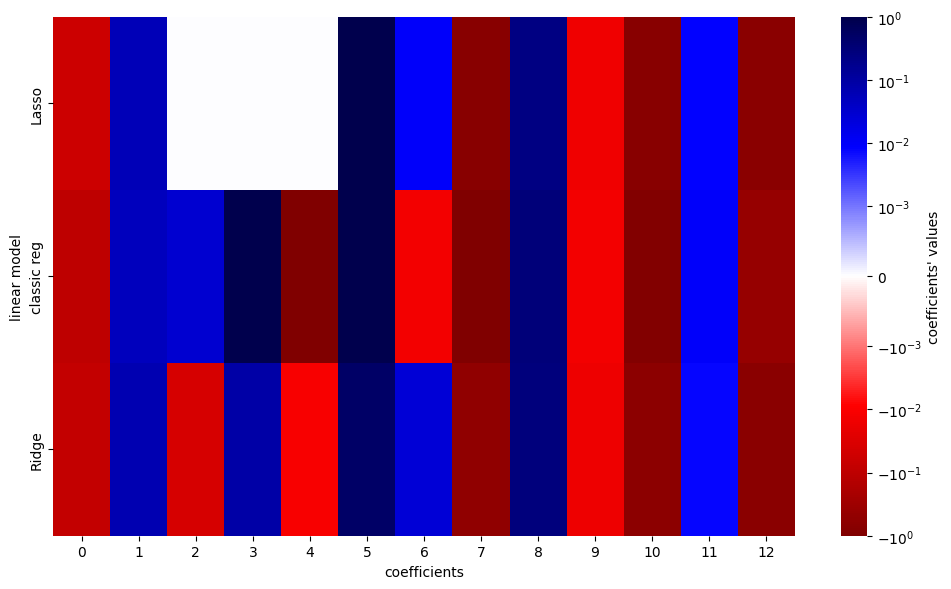

In [32]:
lasso = Lasso(alpha=1).fit(X ,y ) 
ridge = Ridge(alpha=1000).fit(X ,y ) 
reg2=   reg.fit(X,y)
test = pd.DataFrame(
    { 
        "Lasso": lasso.coef_,
        "classic reg": reg2.coef_,
        "Ridge": ridge.coef_,
    }
)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    test.T,
    norm=cls.SymLogNorm(linthresh=10e-4, vmin=-1, vmax=1),
    cbar_kws={"label": "coefficients' values"},
    cmap="seismic_r",
)
plt.ylabel("linear model")
plt.xlabel("coefficients")
 
plt.tight_layout()

In [35]:
print(search)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047...
       0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953, 0.954,
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999])},
             scoring='neg_mean_squared_error')


Best alpha: {'alpha': 0.025}
Best score: 5.496188849818414


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Mean score')

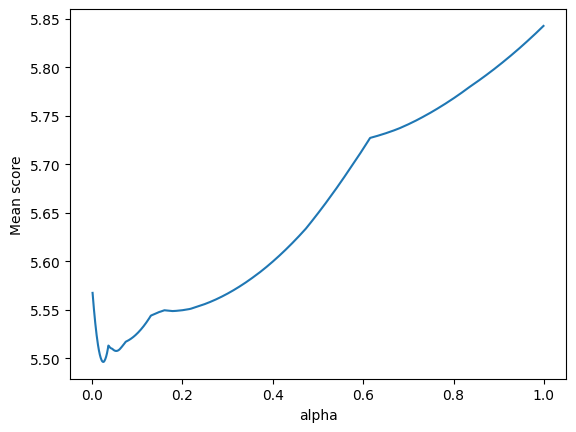

Reg rmse: [3.17938836 4.58157263 5.42751592 8.07366418 5.02982693]
Reg mean: 5.25839360410932


CRIM      -0.099720
ZN         0.057807
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
RM         2.697488
AGE       -0.011043
DIS       -0.927555
RAD        0.261538
TAX       -0.015767
PTRATIO   -0.782668
B          0.008841
LSTAT     -0.549120
dtype: float64

In [31]:
#hyperparameter tuning
grid = dict()
grid['alpha'] = np.arange(0.001, 1, 0.001)
n_folds=5
# define search
search = GridSearchCV(Lasso(), grid, scoring='neg_mean_squared_error', cv=n_folds, n_jobs=-1)
# perform the search
results = search.fit(X, y)
#output results for best fit
k = search.best_params_
print("Best alpha: {}".format(k))
score = search.best_score_
rsm = np.sqrt(-score)
print("Best score: {}".format(rsm))
 
plt.plot(grid['alpha'],np.sqrt(-search.cv_results_["mean_test_score"]))
plt.xlabel('alpha')
plt.ylabel('Mean score')
plt.show()

regression_model_cv(Lasso(alpha=0.025))

#increasing alpha induces sparsity
pd.Series(Lasso(alpha=0.5).fit(X_train,y_train).coef_, index = X_train.columns)

# 6. K-Nearest Neighbors, Decision Trees, and Random Forests

The idea behind K-Nearest Neighbors (KNN) is straightforward. When choosing the output of a row with an unknown label, the prediction is the same as the output of its k-nearest neighbors, where k may be any whole number. 

For instance, let's say that k=3. Given an unknown label, we take n columns for this row and place them in n-dimensional space. Then we look for the three closest points. These points already have labels. We assume the majority label for our new point. 

KNN is commonly used for classification since classification is based on grouping values, but it can be applied to regression as well. When determining the value of a home, for instance, in our Boston Housing dataset, it makes sense to compare the values of homes in a similar location, with a similar number of bedrooms, a similar amount of square footage, and so on. 

You can always choose the number of neighbors for the algorithm and adjust it accordingly. The number of neighbors denoted here is k, which is also called a hyperparameter. In machine learning, the model parameters are derived during training, whereas the hyperparameters are chosen in advance. 

Fine-tuning hyperparameters is an essential task to master when building machine learning models. Learning the ins and outs of hyperparameter tuning takes time, practice, and experimentation.

## 6.1 Exercise 147: Using KNN to estimate median home values

In [36]:
from sklearn.neighbors import KNeighborsRegressor
regression_model_cv(KNeighborsRegressor())

Reg rmse: [ 8.24568226  8.81322798 10.58043836  8.85643441  5.98100069]
Reg mean: 8.495356738515685


In [37]:
regression_model_cv(KNeighborsRegressor(n_neighbors=4))

Reg rmse: [ 8.44659788  8.99814547 10.97170231  8.86647969  5.72114135]
Reg mean: 8.600813339223432


In [38]:
regression_model_cv(KNeighborsRegressor(n_neighbors=7))

Reg rmse: [ 7.99710601  8.68309183 10.66332898  8.90261573  5.51032355]
Reg mean: 8.351293217401393


In [39]:
regression_model_cv(KNeighborsRegressor(n_neighbors=10))

Reg rmse: [ 7.47549287  8.62914556 10.69543822  8.91330686  6.52982222]
Reg mean: 8.448641147609868


The best results so far come from 7 neighbors. But how do we know if 7 neighbors give us the best results? How many different scenarios do we have to check? Scikit-learn provides a nice option to check a wide range of hyperparameters, which is `GridSearchCV`. The idea behind `GridSearchCV` is to use cross-validation to check all possible values in a grid. The value in the grid that gives the best result is then accepted as a hyperparameter.

## 6.2 Exercise 148: KNN with GridSearchCV to find optimal number of neighbors

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
neighbors = np.linspace(1, 20, 20)
k = neighbors.astype(int)
param_grid = {'n_neighbors': k}

In [42]:
knn = KNeighborsRegressor()

In [43]:
knn_tuned = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

In [44]:
knn_tuned.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_mean_squared_error')

Best n_neighbors: {'n_neighbors': 7}
Best score: 8.516767055977628


Text(0.5, 0, 'n_neighbors')

Text(0, 0.5, 'Mean score')

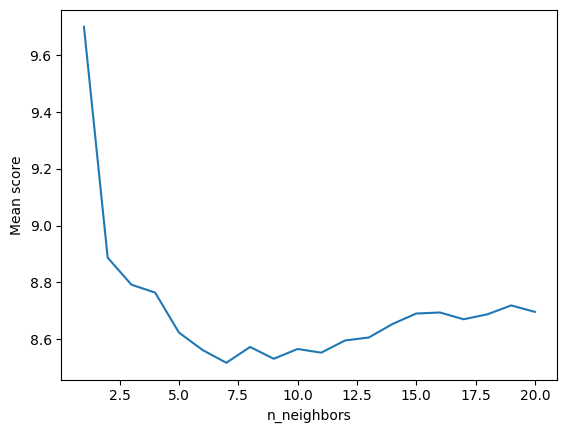

In [45]:
k = knn_tuned.best_params_
print("Best n_neighbors: {}".format(k))
score = knn_tuned.best_score_
rsm = np.sqrt(-score)
print("Best score: {}".format(rsm))

plt.plot(param_grid['n_neighbors'],np.sqrt(-knn_tuned.cv_results_["mean_test_score"]))
plt.xlabel('n_neighbors')
plt.ylabel('Mean score')
plt.show()

## 6.3 Decision trees and random forests

Decision Trees are very good machine learning algorithms, but they are prone to overfitting. A random forest is an ensemble of decision trees. Random forests consistently outperform decision trees because their predictions generalize to data much better. A random forest may consist of hundreds of decision trees.

## 6.4 Exercise 149: Decision trees and random forests

In [47]:
from sklearn import tree
regression_model_cv(tree.DecisionTreeRegressor())

Reg rmse: [3.81011313 5.48964503 6.70381527 6.71394732 5.55763508]
Reg mean: 5.655031165611726


In [48]:
from sklearn.ensemble import RandomForestRegressor
regression_model_cv(RandomForestRegressor())

Reg rmse: [3.21542034 3.88197893 4.73687071 6.55574799 4.2276764 ]
Reg mean: 4.523538874938079


## 6.5 Random forest hyperparameters

Random forests have a lot of hyperparameters. Instead of going over them all, we will highlight the most important ones:
- **n_jobs(default=None)**: The number of jobs has to do with internal processing. None means 1. It's ideal to set n_jobs = -1 to permit the use of all processors. Although this does not improve the accuracy of the model, it does improve the speed. 
- **n_estimators(default=10)**: The number of trees in the forest. The more trees, the better. The more trees, the more RAM is required. It's worth increasing this number until the algorithm moves too slowly. Although 1,000,000 trees may give better results than 1,000, the gain might be small enough to be negligible. A good starting point is 100, and 500 if time permits. 
- **max_depth(default=None)**: The max depth of the trees in the forest. The deeper the trees, the more information is captured about the data, but the more prone the trees are to overfitting. When set to the default max_depth of None, there are no limitations, and each tree goes as deep as necessary. The max depth may be reduced to a smaller number of branches. 
- **min_samples_split(default=2)**: This is the minimum number of samples required for a new branch or split to occur. This number can be increased to constrain the trees as they require more samples to make a decision.  
- **min_samples_leaf(default=1)**: This is the same as min_samples_split, except it's the minimum number of samples at the leaves or the base of the tree. By increasing this number, the branch will stop splitting when it reaches this parameter. 
- **max_features(default="sqrt")**: The number of features to consider when looking for the best split. The default for regression is to consider the total number of columns. For classification random forests, **sqrt** is recommended.

## 6.6 Exercise 150: Random forest tuned to improve prediction

In [49]:
regression_model_cv(RandomForestRegressor(n_jobs=-1, n_estimators=100))

Reg rmse: [3.16510277 3.7999569  5.02184645 6.52109893 4.05594949]
Reg mean: 4.512790908652781


In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
param_grid = {'max_depth': [None, 10, 30, 50, 70, 100, 200, 400],
             'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3],
             'max_features': ['sqrt', 'log2']} #8*4*3* 2 *CV*100

In [52]:
reg = RandomForestRegressor(n_jobs = -1)

In [53]:
reg_tuned = RandomizedSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [54]:
reg_tuned.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
                   param_distributions={'max_depth': [None, 10, 30, 50, 70, 100,
                                                      200, 400],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring='neg_mean_squared_error')

In [55]:
p = reg_tuned.best_params_
print("Best tuned params: {}".format(p))
score = reg_tuned.best_score_
rsm = np.sqrt(-score)
print("Best score: {}".format(rsm))

Best tuned params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best score: 4.690361837232547


Keep in mind that with `RandomizedSearchCV`, there is no guarantee that the hyperparameters will produce the best results. Although the randomized search did well, it did not perform as well as the defaults with n_jobs = -1 and n_estimators = 100.

In [56]:
# Setup the hyperparameter grid
regression_model_cv(RandomForestRegressor(n_jobs=-1, n_estimators=100))

Reg rmse: [3.0858976  3.95399021 5.0105027  6.58901054 4.17959589]
Reg mean: 4.563799387391246


**Note**: Increasing n_estimators every time will produce more accurate results, but the model takes longer to build.

# 7. Classification models

Let's load a new dataset used to detect pulsar stars in outer space. Go to https://packt.live/33SD0IM and click on Data Folder. Then, click on HTRU2.zip.  Alternatively, download from Canvas.

In [57]:
df = pd.read_csv('HTRU_2.csv',header=None) 
df.columns = [['Mean of integrated profile', 'Standard deviation of integrated profile', 'Excess kurtosis of integrated profile', 'Skewness of integrated profile', 'Mean of DM-SNR curve', 'Standard deviation of DM-SNR curve', 'Excess kurtosis of DM-SNR curve', 'Skewness of DM-SNR curve', 'Class' ]] 
df.head()
df.info()
len(df)

,Mean of integrated profile,Standard deviation of integrated profile,Excess kurtosis of integrated profile,Skewness of integrated profile,Mean of DM-SNR curve,Standard deviation of DM-SNR curve,Excess kurtosis of DM-SNR curve,Skewness of DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (Mean of integrated profile,)                17898 non-null  float64
 1   (Standard deviation of integrated profile,)  17898 non-null  float64
 2   (Excess kurtosis of integrated profile,)     17898 non-null  float64
 3   (Skewness of integrated profile,)            17898 non-null  float64
 4   (Mean of DM-SNR curve,)                      17898 non-null  float64
 5   (Standard deviation of DM-SNR curve,)        17898 non-null  float64
 6   (Excess kurtosis of DM-SNR curve,)           17898 non-null  float64
 7   (Skewness of DM-SNR curve,)                  17898 non-null  float64
 8   (Class,)                                     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


17898

## 7.1 Exercise 152: Using Logistic Regression to Predict Data Accuracy

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [62]:
##classical reg:  Y = Xbeta +int+epsilon --> betahat = (X^TX)^(-1)X^TY
##logistic reg:  log(p_1/(1-p_1))=Xbeta +int+epsilon y=1 --> log(y/(1-y)) -inf: descent gradient
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [63]:
def clf_model(model):
    clf = model

    scores = cross_val_score(clf, X, y)

    print('Scores:', scores)
    print('Mean score:', scores.mean())

In [64]:
clf_model(LogisticRegression(max_iter=1000))
#had to increase number of iterations from 100 to 1000 to reach convergence

Scores: [0.97486034 0.97988827 0.98184358 0.97736798 0.9782062 ]
Mean score: 0.9784332723007113


97.8% of pulsars accurately classified (pulsar vs non-pulsar)

## 7.2 Naive Bayes

Naive Bayes is a model based on Bayes' theorem, a famous probability theorem based on a conditional probability that assumes independent events. Similarly, Naive Bayes assumes independent attributes or columns. The mathematical details of Naive Bayes are beyond the scope of this course, but we can still apply it to our dataset.

Y |X, sigma ~ N(beta0+beta1X, signa)
sigma ~ beta()

There is a small family of machine learning algorithms based on Naive Bayes. The one that we will use here is `GaussianNB`. Gaussian Naive Bayes assumes that the likelihood of features is Gaussian. Other options that you may consider trying include `MultinomialNB`, used for multinomial distributed data (such as text), and `ComplementNB`, an adaptation of `MultinomialNB` that is used for imbalanced datasets.

## 7.3 Exercise 153: Using GaussianNB, KneighborsClassifier, DecisionTreeClassifier, and RandomForestClassifier to Predict Accuracy in Our Dataset

In [65]:
from sklearn.naive_bayes import GaussianNB
clf_model(GaussianNB())

Scores: [0.96061453 0.92374302 0.94273743 0.92847164 0.96451523]
Mean score: 0.9440163679814436


In [66]:
from sklearn.neighbors import KNeighborsClassifier
clf_model(KNeighborsClassifier())

Scores: [0.96955307 0.96927374 0.97318436 0.9706622  0.97289746]
Mean score: 0.9711141653437728


In [67]:
from sklearn.tree import DecisionTreeClassifier
clf_model(DecisionTreeClassifier())

Scores: [0.96843575 0.96340782 0.96731844 0.963677   0.96870634]
Mean score: 0.9663090716953802


In [68]:
from sklearn.ensemble import RandomForestClassifier
clf_model(RandomForestClassifier())

Scores: [0.97681564 0.98184358 0.97988827 0.97373568 0.97876502]
Mean score: 0.9782096369105318


All classifiers have achieved between 94% and 98% accuracy. It's unusual for this many classifiers to all perform this well. There must be clear patterns within the data, or something is going on behind the scenes.

## 7.4 Confusion matrices

When discussing classification, it's important to know whether the dataset is imbalanced, as we had some doubts about the results from Exercise 153. Using GaussianNB, KneighborsClassifier, DecisionTreeClassifier and RandomForestClassifier to Predict Accuracy in Our Dataset. An imbalance occurs if the majority of data points have one label rather than another.

## 7.5 Exercise 154: Finding the Pulsar Percentage from the Dataset

In [69]:
df.Class.count()

Class    17898
dtype: int64

In [70]:
df[df.Class == 1].Class.count()

Class    1639
dtype: int64

In [65]:
df[df.Class == 1].Class.count()/df.Class.count()

Class    0.091574
dtype: float64

The results show that 0.09158 or 9% of the data are pulsars. The other 91% are not pulsars. This means that it's very easy to make a machine learning algorithm in this case with 91% accuracy to predict that every row is not a pulsar.

## 7.6 Exercise 155: Confusion Matrix and Classification Report for the Pulsar Dataset

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [73]:
def confusion(model):
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('Classification Report:', classification_report(y_test, y_pred))
    return clf

In [74]:
confusion(LogisticRegression(max_iter=1000))
#confusion mat: [ [#of correctly classfied 0s  #of incorrectly classfied 0s] ,[ #of incorrectly classifed 1s  # of correct 1s]]

Confusion Matrix: [[4066   17]
 [  82  310]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4083
           1       0.95      0.79      0.86       392

    accuracy                           0.98      4475
   macro avg       0.96      0.89      0.93      4475
weighted avg       0.98      0.98      0.98      4475



LogisticRegression(max_iter=1000)

In the classification report
- On the far right, support is the number of labels in the dataset. It matches the indexed column on the far left, labeled 0 and 1. **Support** reveals that there are 4,040 non-pulsars (0s) and 435 pulsars (1s). This number is less than the total because we are only looking at the test set. 
- **Precision** is the true positives divided by all the positive predictions. (e.g. 0.98 = 4066/(4066 +82) )
- **Recall** is the true positives divided by all the positive labels. (e.g. 0.98 = 4024/(4024 +16) )
- The **f1-score** is the harmonic mean of the precision and recall scores. Note that the f1 scores are very different for the zeros than the ones. 
(e.g. 0.99 = 2*(0.98*1)/(0.98+1))
The most important number in the classification report depends on what you are trying to accomplish. Consider the case of the pulsars. Is the goal to identify as many potential pulsars as possible? If so, a lower precision is okay, provided that the recall is higher. Or perhaps an investigation would be expensive. In this case, a higher precision than recall would be desirable.

In [70]:
confusion(KNeighborsClassifier())

Confusion Matrix: [[4010   30]
 [ 116  319]]
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4040
           1       0.91      0.73      0.81       435

    accuracy                           0.97      4475
   macro avg       0.94      0.86      0.90      4475
weighted avg       0.97      0.97      0.97      4475



KNeighborsClassifier()

In [71]:
confusion(GaussianNB())

Confusion Matrix: [[3876  164]
 [  80  355]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97      4040
           1       0.68      0.82      0.74       435

    accuracy                           0.95      4475
   macro avg       0.83      0.89      0.86      4475
weighted avg       0.95      0.95      0.95      4475



GaussianNB()

In [72]:
confusion(RandomForestClassifier())

Confusion Matrix: [[4025   15]
 [  81  354]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4040
           1       0.96      0.81      0.88       435

    accuracy                           0.98      4475
   macro avg       0.97      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



RandomForestClassifier()

# 8 Boosting methods

Random Forests are a type of bagging method. A bagging method is a machine learning method that aggregates a large sum of machine learning models. In the case of Random Forests, the aggregates are decision trees. Another machine learning method is boosting. The idea behind boosting is to transform a weak learner into a strong learner by modifying the weights for the rows that the learner got wrong. A weak learner may have an error of 49%, hardly better than a coin flip. A strong learner, by contrast, may have an error rate of 1 or 2 %. With enough iterations, very weak learners can be transformed into very strong learners. 

The success of boosting methods caught the attention of the machine learning community. In 2003, Yoav Fruend and Robert Shapire won the 2003 Godel Prize for developing AdaBoost, short for adaptive boosting. Like many boosting methods, AdaBoost has both a classifier and a regressor. AdaBoost adjusts weak learners toward instances that were previously misclassified. Let's see how the AdaBoost classifier performs on our datasets.
##more details next time

In [75]:
from sklearn.ensemble import AdaBoostClassifier
clf_model(AdaBoostClassifier())

/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Scores: [0.97430168 0.97988827 0.98128492 0.97597094 0.97708857]
Mean score: 0.977706874833175


In [74]:
confusion(AdaBoostClassifier())

/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix: [[4020   20]
 [  91  344]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4040
           1       0.95      0.79      0.86       435

    accuracy                           0.98      4475
   macro avg       0.96      0.89      0.92      4475
weighted avg       0.97      0.98      0.97      4475



AdaBoostClassifier()

In [75]:
X = housing_df.iloc[:,:-1] 
y = housing_df.iloc[:, -1]

from sklearn.ensemble import AdaBoostRegressor

regression_model_cv(AdaBoostRegressor())

Reg rmse: [3.7249328  3.43354004 6.31133168 6.22593543 4.01068115]
Reg mean: 4.741284219869821


For more info on Adaboost, see these links:
- https://towardsdatascience.com/boosting-and-adaboost-clearly-explained-856e21152d3e
- https://cseweb.ucsd.edu/~yfreund/papers/IntroToBoosting.pdf